In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from collections import Counter

In [2]:
path = './Motorcycledata.txt'
colnames = ['t', 'acc']
motion = pd.read_csv(path, sep="\s*[ ]\s*", names=colnames, index_col=0, header=None, engine='python', )
motion.head()

,t,acc
1,2.4,0.0
2,2.6,-1.3
3,3.2,-2.7
4,3.6,0.0
5,4.0,-2.7


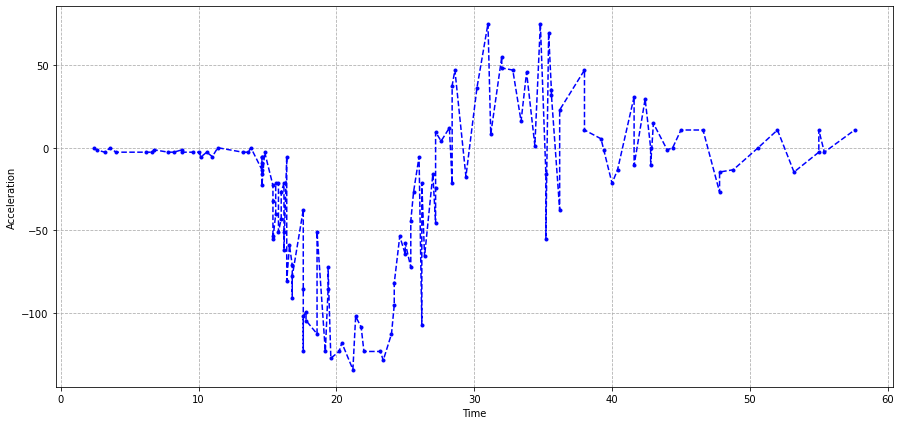

In [3]:
plt.figure(figsize=(15,7))
raw_plot = plt.plot(motion['t'], motion['acc'], '--.b')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.grid(linestyle='--')

In [4]:
t_raw = motion['t']
t_unique = np.sort(list(set(t_raw)))
Y = motion['acc']

m = list(Counter(t_raw).values()) #NUMBER OF VALUES AVAILABLE FOR EACH TIME STEP

count = 0
i = 0
Y_mean = []
while i < len(Y):
    Y_mean.append(list(Y[i:i+m[count]]))
    i += m[count]
    count += 1

In [5]:
Y_m = []
for i in range(len(m)):
    Y_m.append(sum(Y_mean[i])/m[i])

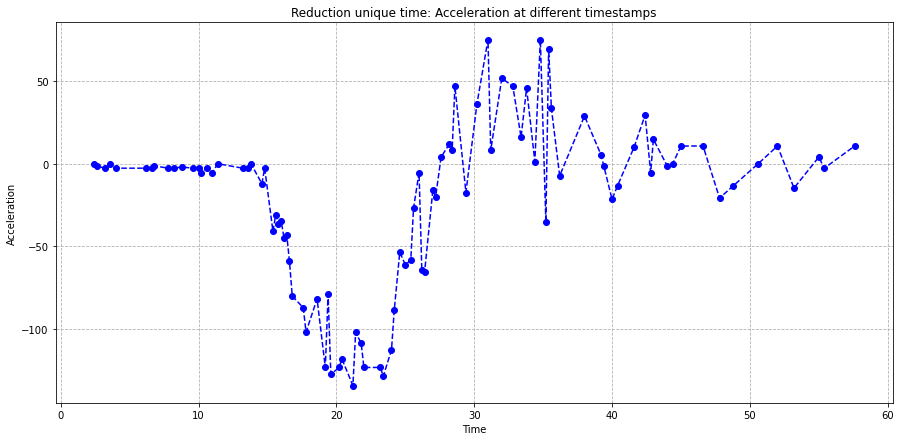

In [6]:
plt.figure(figsize=(15,7))
raw_plot = plt.plot(t_unique, Y_m, '--ob')
plt.title('Reduction unique time: Acceleration at different timestamps')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.grid(linestyle='--')

2. library: polyfit or linear regression while creating X a matrix of coefficients with the required order

In [7]:
X = polynomial_features(degree)

NameError: name 'polynomial_features' is not defined

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


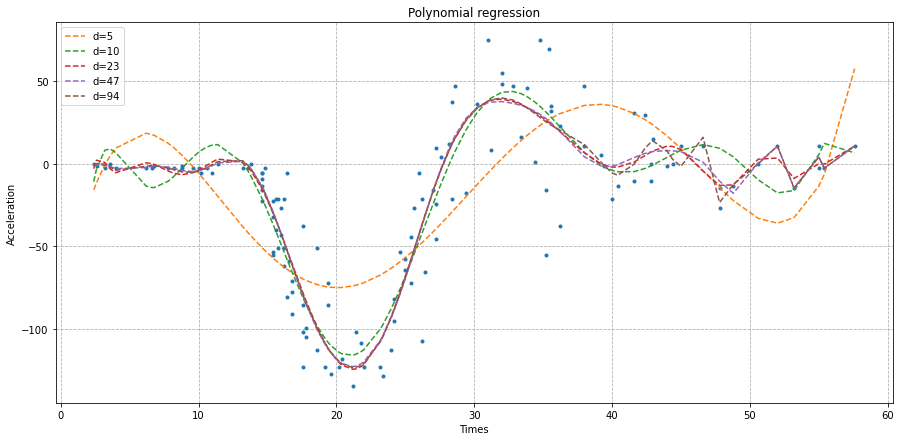

In [8]:
plt.figure(figsize=(15,7))
raw_plot = plt.plot(motion['t'], motion['acc'], '.')
for deg in [5, 10, int(len(m)/ 4), int(len(m)/2), len(m)]:
    coefs = np.polyfit(t_unique, Y_m, deg)
    vals = np.polyval(coefs, t_unique)
    plt.plot(t_unique, vals, linestyle='--', label='d='+str(deg))
plt.title('Polynomial regression')
plt.xlabel('Times')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(linestyle='--')
plt.show()

3. spline regression

In [9]:
colab: 
    https://colab.research.google.com/drive/1Qy8aHA1JgjEf_yOCJfUpVeqS1NvgwRZi?usp=sharing&fbclid=IwAR2TGGCIgSqCCz1Jj5j6NnRaCRpAZUFJYUwztz1ec0S13uF_hGhQGeD7Uvk#scrollTo=7BgNNJNsgoBF

SyntaxError: invalid syntax (<ipython-input-9-ac7dffe25a32>, line 1)

In [11]:
# Set initial data
n = len(t_unique)
X = t_unique.reshape(-1,1)
y = np.array(Y_m)

# Initialize vector h, matrices Q and R
I = np.eye(n)
h = np.diff(X.ravel()) # intervals between timestamps (n-1) 
Q = np.zeros((n,n-2))
R = np.zeros((n-2,n-2))

# Fill matrix Q
for j in range(n-2):
    Q[j:j+3,j] = np.array([[1/h[j]], [-1/h[j]-1/h[j+1]], [1/h[j+1]]]).ravel()
# Fill matrix R
for j in range(n-3):
    R[j,j] = (h[j-1]+h[j])/3
    R[j,j+1] = h[j]/6
    R[j+1,j] = h[j]/6
R[n-3,n-3] = (h[n-3]+h[n-2])/3
# Compute matrix K
K = Q@np.linalg.inv(R)@Q.T

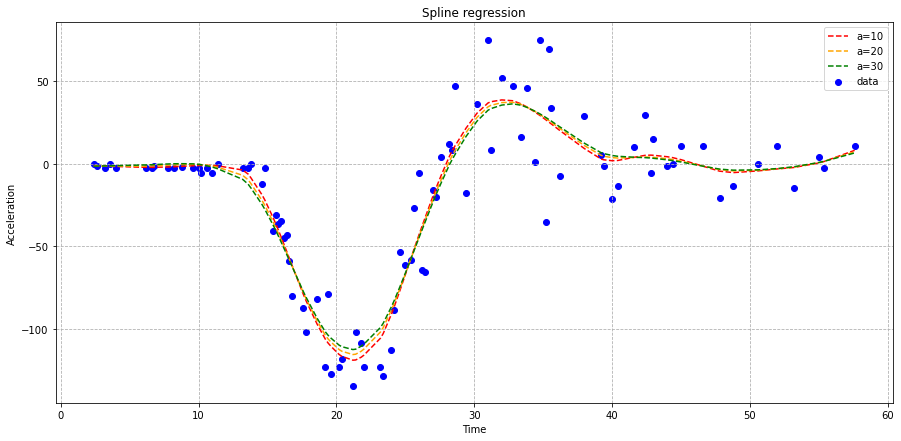

In [45]:
weighted = True
alphas = [10,20,30]
g_hat = np.zeros((n,3))
W = np.diag(m)

for k in range(3):
    if not weighted:
        g_hat[:,k] = np.linalg.solve(a=(I+alphas[k]*K),b=y)
    else:
        g_hat[:,k] = np.linalg.solve(a=(W+alphas[k]*K),b=W@y)
plt.figure(figsize=(15,7))
plt.scatter(X,y,label='data', marker='o', color='b')
plt.plot(X,ghat.T[0],label='a=10',linestyle='--', color='r')
plt.plot(X,ghat.T[1],label='a=20',linestyle='--', color='orange')
plt.plot(X,ghat.T[2],label='a=30',linestyle='--', color='g')
plt.title('Spline regression')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(linestyle='--')
plt.show()

The bigger the alpha, the more the concavity is reduced ( less variance )

4. Cross validation - Leave One Out

In [62]:
alphas = np.arange(1,101)
CV = []
for alpha in alphas:
    g = np.linalg.solve(a=(W+alpha*K),b=W@y)
    w = np.array(m)
    Aw = np.linalg.inv(W + alpha * K)@W
    Awii = np.diag(Aw)
    cv = w.dot(np.divide(y - g, 1 - Awii)**2)/n
    CV.append(cv)
print("best alpha =", np.argmin(CV), "It gives a CV value of", np.min(CV))

best alpha = 15 It gives a CV value of 528.2197481991683


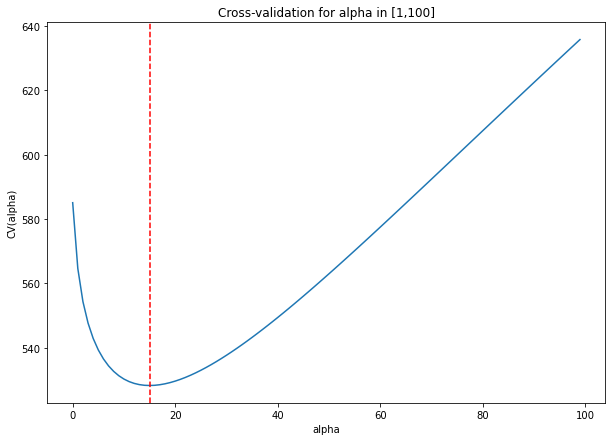

In [63]:
plt.figure(figsize=(10,7))
plt.plot(CV)
plt.axvline(x=np.argmin(CV),linestyle='--',color='r')
plt.title('Cross-validation for alpha in [1,100]')
plt.xlabel('alpha')
plt.ylabel('CV(alpha)')
plt.show()

5. Generalized Cross validation

In [92]:
alphas = np.arange(1,101)
GCV = []
for alpha in alphas:
    g = np.linalg.solve(a=(W+alpha*K),b=W@y)
    w = np.array(m)
    Aw = np.linalg.inv(W + alpha * K)@W
    gcv = w.dot((y - g)**2)/(1-np.trace(Aw)/n)**2/n
    GCV.append(gcv)
print("best alpha =", np.argmin(GCV), "It gives a GCV value of", np.min(GCV))

best alpha = 17 It gives a GCV value of 541.3162119561232


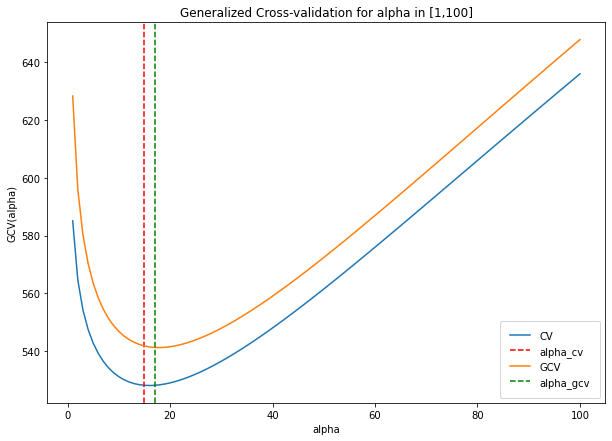

In [93]:
plt.figure(figsize=(10,7))
plt.plot(alphas, CV, label="CV")
plt.axvline(x=np.argmin(CV),linestyle='--',color='r', label='alpha_cv')
plt.plot(alphas, GCV, label='GCV')
plt.axvline(x=np.argmin(GCV),linestyle='--',color='g', label='alpha_gcv')
plt.title('Generalized Cross-validation for alpha in [1,100]')
plt.xlabel('alpha')
plt.ylabel('GCV(alpha)')
plt.legend(loc='lower right', borderpad=1, handletextpad=1)
plt.show()

The GCV was higher than the CV, which wasn't the case in the correction...